In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [76]:
df = pd.read_csv('/Users/anuka/Desktop/brazillian_data-findings/03_revenue_by_state/product_by_state_pct_category.csv')
df.head(5)

,product_category_name_english,customer_state,customer_state_full,total_payment,rank,pct_of_category
0,agro_industry_and_commerce,MG,Minas Gerais,44016.72,1,38.07
1,agro_industry_and_commerce,SP,São Paulo,30871.12,2,26.70
2,agro_industry_and_commerce,RJ,Rio de Janeiro,9770.67,3,8.45
3,air_conditioning,SP,São Paulo,42274.58,1,47.58
4,air_conditioning,RJ,Rio de Janeiro,23252.50,2,26.17


In [77]:
# pivot_df = df.pivot(index = 'customer_state', columns = 'product_category_name_english', values = 'total_payment')
# pivot_df.head(5)

In [78]:
## I want to create only the top categories map 
## Get top 10 product categories by revenue

top_categories = df.groupby('product_category_name_english')['total_payment'].sum().nlargest(10).index
top_categories

Index(['bed_bath_table', 'computers_accessories', 'health_beauty',
       'furniture_decor', 'watches_gifts', 'sports_leisure', 'housewares',
       'garden_tools', 'auto', 'cool_stuff'],
      dtype='object', name='product_category_name_english')

In [79]:
df['product_category_name_english']

0      agro_industry_and_commerce
1      agro_industry_and_commerce
2      agro_industry_and_commerce
3                air_conditioning
4                air_conditioning
                  ...            
207                          toys
208                          toys
209                 watches_gifts
210                 watches_gifts
211                 watches_gifts
Name: product_category_name_english, Length: 212, dtype: object

In [80]:
df_top = df[df['product_category_name_english'].isin(top_categories)]
df_top

,product_category_name_english,customer_state,customer_state_full,total_payment,rank,pct_of_category
15,auto,SP,São Paulo,268468.08,1,32.20
16,auto,MG,Minas Gerais,99769.84,2,11.97
17,auto,RJ,Rio de Janeiro,82395.77,3,9.88
21,bed_bath_table,SP,São Paulo,756727.97,1,44.71
22,bed_bath_table,RJ,Rio de Janeiro,242431.81,2,14.32
23,bed_bath_table,MG,Minas Gerais,216969.38,3,12.82
45,computers_accessories,SP,São Paulo,622332.38,1,40.17
46,computers_accessories,RJ,Rio de Janeiro,189763.18,2,12.25
47,computers_accessories,MG,Minas Gerais,170939.37,3,11.03
60,cool_stuff,SP,São Paulo,245073.71,1,32.91


In [81]:
pivot_df = df_top.pivot(index='customer_state_full', columns = 'product_category_name_english', values = 'total_payment')
pivot_df

product_category_name_english,auto,bed_bath_table,computers_accessories,cool_stuff,furniture_decor,garden_tools,health_beauty,housewares,sports_leisure,watches_gifts
customer_state_full,,,,,,,,,,
Minas Gerais,99769.84,216969.38,170939.37,86486.54,154998.20,102524.02,196285.96,135835.48,153371.65,137957.88
Rio de Janeiro,82395.77,242431.81,189763.18,97561.95,177682.75,113245.71,178266.90,129491.59,174834.05,207651.19
São Paulo,268468.08,756727.97,622332.38,245073.71,533872.18,254857.78,604558.90,434929.47,509044.62,492762.84


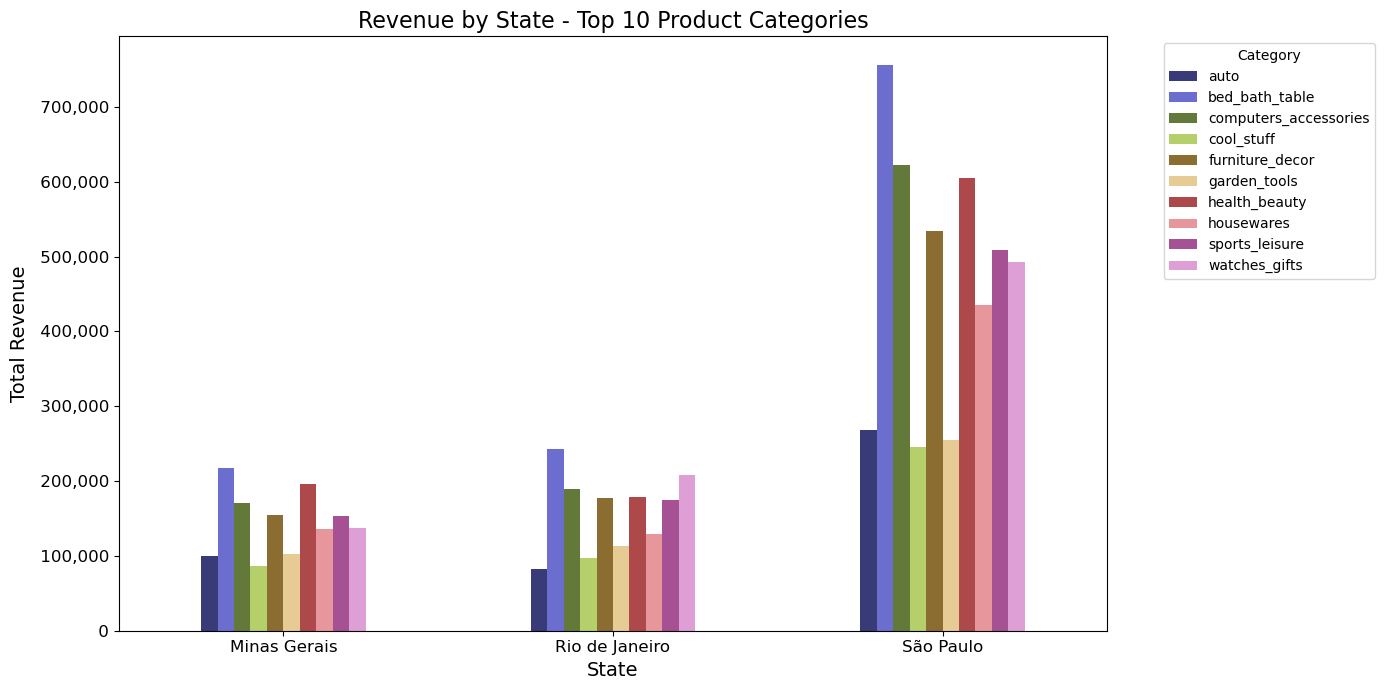

In [82]:
pivot_df.plot(kind='bar', figsize=(14,7), colormap='tab20b')
plt.title ('Revenue by State - Top 10 Product Categories', fontsize = 16)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Total Revenue', fontsize = 14)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize =12)

# Format the y-axis with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x): ,}'))
plt.legend(title='Category', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.show()

In [83]:
df2 = pd.read_csv('/Users/anuka/Desktop/brazillian_data-findings/03_revenue_by_state/Top5_states_by_revenue.csv')
df2

,customer_state,state_name,total_revenue
0,SP,Sao Paulo,5770266.19
1,RJ,Rio de Janeiro,2055690.45
2,MG,Minas Gerais,1819277.61
3,RS,Rio Grande do Sul,861802.40
4,PR,Parana,781919.55


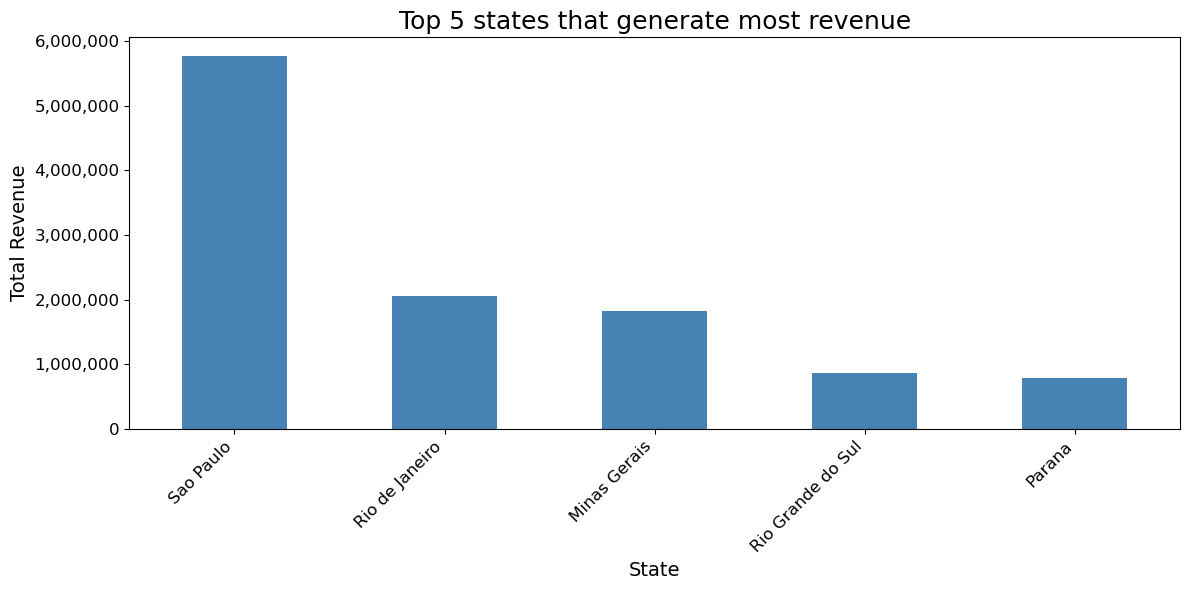

In [84]:
df2.plot(kind='bar', x='state_name', y='total_revenue', figsize=(12,6), legend=False, color='steelblue')
plt.title('Top 5 states that generate most revenue', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize = 12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()



## Top 3 categories per state visualization: 

In [85]:
df3 = pd.read_csv('/Users/anuka/Desktop/brazillian_data-findings/03_revenue_by_state/products_by_region.csv')
df3.head(5)

,customer_state,customer_state_full,product_category_name_english,total_payment,rank
0,AC,Acre,furniture_decor,5261.23,1
1,AC,Acre,sports_leisure,2071.54,2
2,AC,Acre,health_beauty,2067.62,3
3,AL,Alagoas,health_beauty,14741.33,1
4,AL,Alagoas,computers_accessories,14280.47,2


In [86]:
states = df3['customer_state_full'].unique()
n_states = len(states)
n_states

27

In [87]:
pivot2_df = df3.pivot(index='product_category_name_english', columns = 'customer_state_full', values='total_payment')
pivot2_df

customer_state_full,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Espírito Santo,Federal District,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57732.00,NaN,...,20026.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bed_bath_table,NaN,NaN,1899.93,NaN,NaN,NaN,34481.72,NaN,NaN,NaN,...,10397.57,NaN,93423.36,242431.81,NaN,1532.36,NaN,NaN,756727.97,NaN
computers_accessories,NaN,14280.47,4128.95,5866.85,58308.56,19148.15,NaN,38634.68,NaN,32283.55,...,NaN,NaN,108472.88,189763.18,NaN,NaN,63469.16,NaN,622332.38,NaN
fixed_telephony,NaN,NaN,NaN,NaN,NaN,NaN,30248.54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furniture_decor,5261.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,93386.58,NaN,NaN,1172.05,60206.09,8544.12,NaN,NaN
garden_tools,NaN,NaN,NaN,2267.80,NaN,NaN,NaN,NaN,42451.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7908.35,NaN,NaN
health_beauty,2067.62,14741.33,NaN,4566.70,65382.14,45615.12,NaN,38294.58,NaN,17625.19,...,14944.45,16112.05,NaN,NaN,8517.22,NaN,NaN,9639.74,604558.90,8368.96
housewares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41963.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signaling_and_security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# create regional mapping: 
region_map = {
    'Acre': 'North', 'Amazonas': 'North', 'Amapá': 'North', 'Pará': 'North', 
    'Rondônia': 'North', 'Roraima': 'North', 'Tocantins': 'North',
    'Alagoas': 'Northeast', 'Bahia': 'Northeast', 'Ceará': 'Northeast', 
    'Maranhão': 'Northeast', 'Paraíba': 'Northeast', 'Pernambuco': 'Northeast', 
    'Piauí': 'Northeast', 'Rio Grande do Norte': 'Northeast', 'Sergipe': 'Northeast',
    'Federal District': 'Central-West', 'Goiás': 'Central-West', 
    'Mato Grosso': 'Central-West', 'Mato Grosso do Sul': 'Central-West',
    'Espírito Santo': 'Southeast', 'Minas Gerais': 'Southeast', 
    'Rio de Janeiro': 'Southeast', 'São Paulo': 'Southeast',
    'Paraná': 'South', 'Rio Grande do Sul': 'South', 'Santa Catarina': 'South'
}



In [89]:
df3['region'] = df3['customer_state_full'].map(region_map)
df3.head(4)

,customer_state,customer_state_full,product_category_name_english,total_payment,rank,region
0,AC,Acre,furniture_decor,5261.23,1,North
1,AC,Acre,sports_leisure,2071.54,2,North
2,AC,Acre,health_beauty,2067.62,3,North
3,AL,Alagoas,health_beauty,14741.33,1,Northeast


In [90]:
regional_data = df3.groupby(['region', 'product_category_name_english'])['total_payment'].sum().reset_index()
regional_data

,region,product_category_name_english,total_payment
0,Central-West,auto,76181.07
1,Central-West,computers_accessories,38634.68
2,Central-West,garden_tools,42451.17
3,Central-West,health_beauty,73388.20
4,Central-West,housewares,55119.09
5,Central-West,signaling_and_security,19457.04
6,Central-West,sports_leisure,51226.78
7,North,bed_bath_table,3432.29
8,North,computers_accessories,9995.80
9,North,furniture_decor,26190.94


In [91]:
# get top 3 product categories per region

regional_top3 = regional_data.sort_values(['region', 'total_payment'], ascending=[True, False]).groupby('region').head(3)
regional_top3

,region,product_category_name_english,total_payment
0,Central-West,auto,76181.07
3,Central-West,health_beauty,73388.20
4,Central-West,housewares,55119.09
11,North,health_beauty,54666.13
13,North,watches_gifts,37836.02
9,North,furniture_decor,26190.94
19,Northeast,health_beauty,259436.40
16,Northeast,computers_accessories,139747.60
23,Northeast,watches_gifts,100859.21
26,South,furniture_decor,267653.18


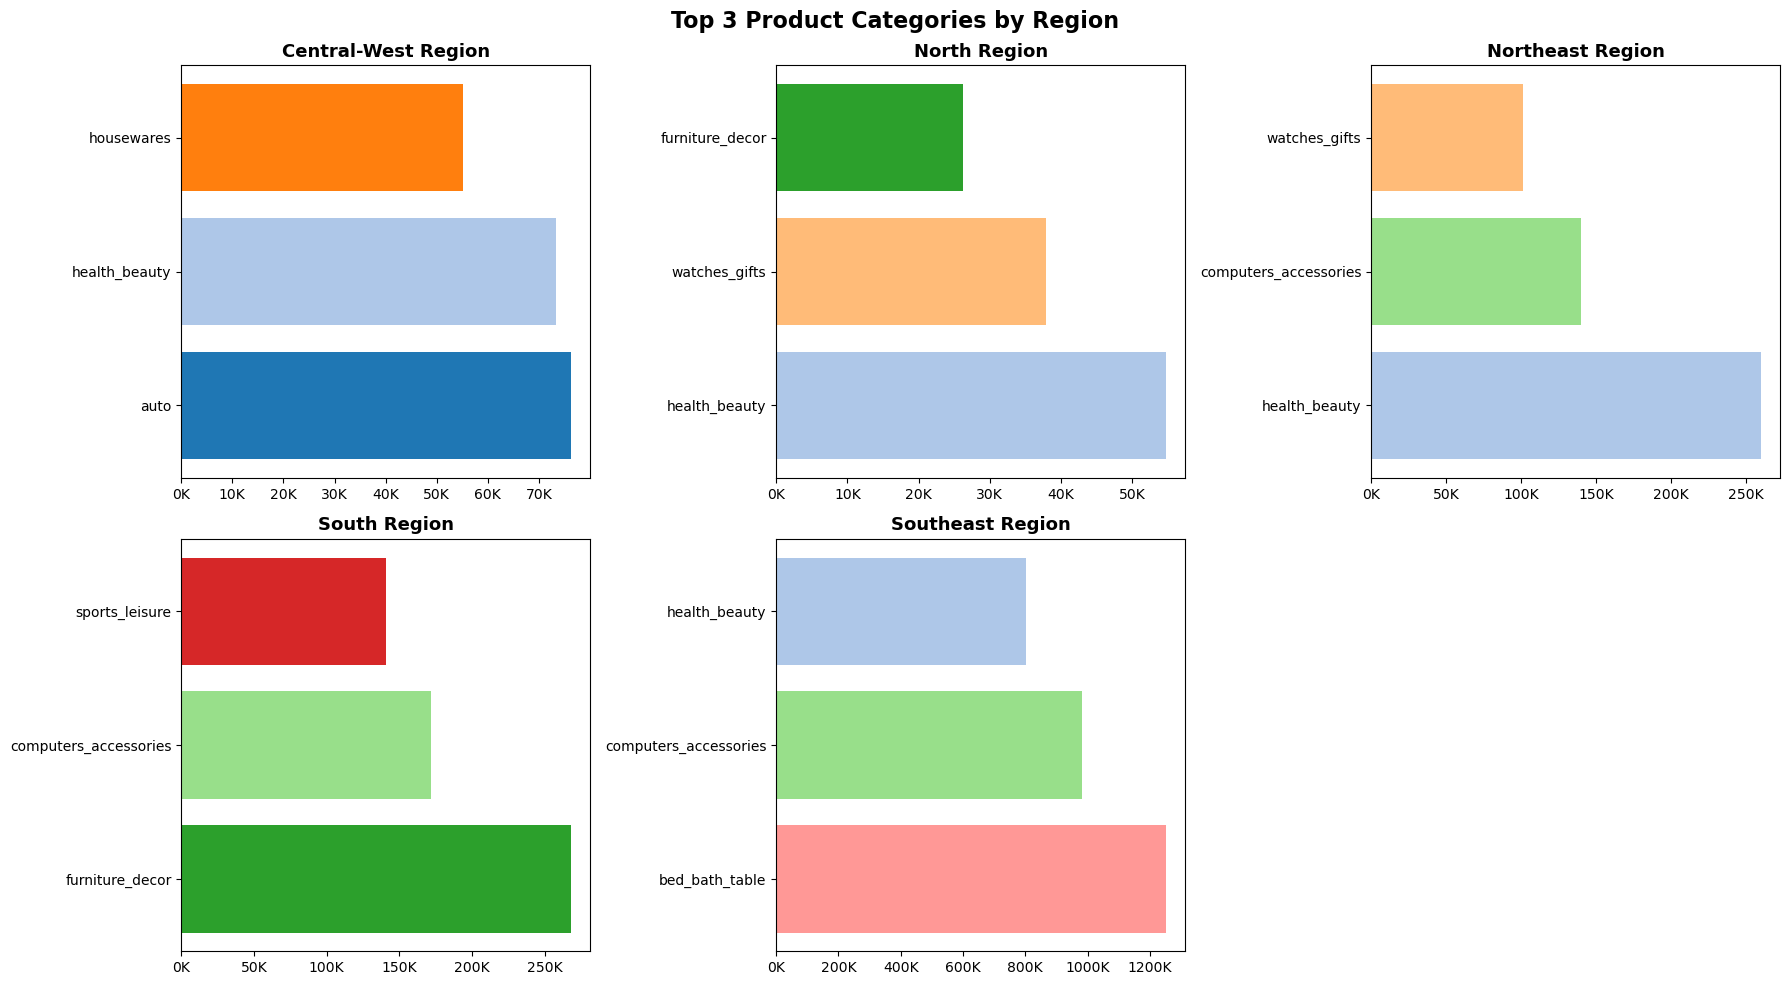

In [92]:
# Visualize

regions = regional_top3['region'].unique()
all_categories = regional_top3['product_category_name_english'].unique()
fig, axes = plt.subplots(2,3, figsize = (18,10))
colors = plt.cm.tab20(range(len(all_categories)))  # tab20 gives 20 distinct colors
category_colors = dict(zip(all_categories, colors))


axes = axes.flatten()

for index, region in enumerate(regions):
    region_data = regional_top3[regional_top3['region'] == region]
    bar_colors = [category_colors[cat] for cat in region_data['product_category_name_english']]
    #axes[index].barh(region_data['product_category_name_english'], region_data['total_payment'], color='steelblue')
    axes[index].barh(region_data['product_category_name_english'], 
                   region_data['total_payment'], 
                   color=bar_colors) 
    axes[index].set_title(f'{region} Region', fontsize=13, fontweight='bold')
    axes[index].tick_params(axis='both', labelsize=10)
    axes[index].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
axes[-1].axis('off')
plt.suptitle('Top 3 Product Categories by Region', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [93]:
regions = regional_top3['region'].unique()
regions

array(['Central-West', 'North', 'Northeast', 'South', 'Southeast'],
      dtype=object)

In [94]:
plt.figure(figsize = (12,6))
category_frequency.head(15).plot(kind='barh', color='coral')

NameError: name 'category_frequency' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
customer_segments = pd.read_csv('/Users/anuka/Documents/python_projects/october/customer_segemnts_new.csv')

In [ ]:
customer_segments.head(5)

,segment,customer_count,customer_pct,total_revenue,revenue_pct,avg_spent,avg_items,avg_recency_days
0,Mid-Value at Risk,15472,16.0,2601098,19.7,168.12,1.2,412.5
1,VIP at risk,3871,4.0,2437778,18.4,629.75,1.4,421.4
2,Mid-Value Cooling Down,11659,12.1,1915424,14.5,164.29,1.2,195.6
3,VIP Cooling Down,2716,2.8,1691807,12.8,622.90,1.4,193.9
4,Low Value Churned,28765,29.8,1546042,11.7,53.75,1.1,415.4


In [ ]:
import plotly.express as px


fig = px.scatter(customer_segments, 
                 x = 'avg_recency_days',
                 y = 'avg_spent',
                 size='customer_count',
                 color = 'segment',
                 color_discrete_sequence=px.colors.qualitative.Bold,
                 text = 'segment',
                 hover_data = ['revenue_pct', 'customer_pct', 'total_revenue'], 
                 title = 'Customer Segmentation: Value vs. Engagement Risk')

fig.update_traces(textposition ='top center', textfont_size = 8)
fig.show()


In [ ]:
customer_segments_data = pd.read_csv('/Users/anuka/Documents/python_projects/october/customer_segs.csv')

In [ ]:
#customer_segments_data.head(10)
print(customer_segments_data.value_counts())

customer_id                       total_order_items  recency_days  total_spent  segment               
00012a2ce6f8dcda20d059ce98491703  1                  336.327477    89.80        Low-Value Churned         1
aa5e0a0c36015d39de864189a2b00b09  1                  63.177616     76.00        Low-Value Recent          1
aa6190994371836fc1d4596edd827abd  1                  292.109745    210.00       Mid-Value At Risk         1
aa606152f23a5fa9ba3d0b87f7a492e8  1                  273.028854    55.00        Low-Value Churned         1
aa601b3c45980c0918042d5ca7a25054  1                  215.292234    49.99        Others                    1
                                                                                                         ..
5584b1ace8b18cc156ce51b989fd2958  1                  168.216852    60.00        Others                    1
558499c2027ec01d530fb975ce2e5b2f  1                  557.401956    17.90        Low-Value Churned         1
55846a9bb9076de56da44e430349ad1a 

In [ ]:
customer_segments_data['recency_days'].describe()

count    96478.000000
mean       288.021158
std        152.838560
min         48.374572
25%        164.211956
50%        269.176562
75%        397.624731
max        761.488449
Name: recency_days, dtype: float64

In [ ]:
percentiles = customer_segments_data['recency_days'].quantile([0.25, 0.33, 0.50, 0.66, 0.75])
print('Recency percentiles:')
print(percentiles)

Recency percentiles:
0.25    164.211956
0.33    197.399138
0.50    269.176562
0.66    337.197493
0.75    397.624731
Name: recency_days, dtype: float64


In [ ]:
threshold_33 = customer_segments_data['recency_days'].quantile(0.33)
threshold_66 = customer_segments_data['recency_days'].quantile(0.66)


print(f"\nThirds Approach:")
print(f"Active: ≤ {threshold_33:.0f} days (top 33%)")
print(f"Cooling: {threshold_33:.0f} - {threshold_66:.0f} days (middle 33%)")
print(f"At Risk: > {threshold_66:.0f} days (bottom 33%)")


Thirds Approach:
Active: ≤ 197 days (top 33%)
Cooling: 197 - 337 days (middle 33%)
At Risk: > 337 days (bottom 33%)


In [ ]:
threshold_25 = customer_segments_data['recency_days'].quantile(0.25)
threshold_75 = customer_segments_data['recency_days'].quantile(0.75)

print(f"\nQuartiles Approach:")
print(f"Active: ≤ {threshold_25:.0f} days (top 25%)")
print(f"Cooling: {threshold_25:.0f} - {threshold_75:.0f} days (middle 50%)")
print(f"At Risk: > {threshold_75:.0f} days (bottom 25%)")


Quartiles Approach:
Active: ≤ 164 days (top 25%)
Cooling: 164 - 398 days (middle 50%)
At Risk: > 398 days (bottom 25%)


In [ ]:
customer_segments_data['total_spent'].describe()

count    96478.000000
mean       137.041586
std        209.045198
min          0.850000
25%         45.900000
50%         86.575000
75%        149.900000
max      13440.000000
Name: total_spent, dtype: float64

In [ ]:
threshold_25_spent = customer_segments_data['total_spent'].quantile(0.25)
threshold_75_spent = customer_segments_data['total_spent'].quantile(0.75)

In [ ]:
print(f"\nQuartiles Approach:")
print(f"Active: ≤ {threshold_25_spent:.0f} dollars (top 25%)")
print(f"Cooling: {threshold_25_spent:.0f} - {threshold_75_spent:.0f} dollars (middle 50%)")
print(f"At Risk: > {threshold_75_spent:.0f} dollars (bottom 25%)")


Quartiles Approach:
Active: ≤ 46 dollars (top 25%)
Cooling: 46 - 150 dollars (middle 50%)
At Risk: > 150 dollars (bottom 25%)


In [ ]:
top_three = pd.read_csv('/Users/anuka/Documents/python_projects/october/top_three_categories.csv')
top_three.head(10)

,customer_state_full,product_category,total_payment,rank
0,Acre,furniture_decor,5261.23,1
1,Acre,sports_leisure,2071.54,2
2,Acre,health_beauty,2067.62,3
3,Alagoas,health_beauty,14741.33,1
4,Alagoas,computers_accessories,14280.47,2
5,Alagoas,watches_gifts,13249.34,3
6,Amazonas,computers_accessories,5866.85,1
7,Amazonas,health_beauty,4566.70,2
8,Amazonas,garden_tools,2267.80,3
9,Amapá,computers_accessories,4128.95,1


In [ ]:
top_three['product_category'].unique()

array(['furniture_decor', 'sports_leisure', 'health_beauty',
       'computers_accessories', 'watches_gifts', 'garden_tools',
       'bed_bath_table', 'fixed_telephony', 'auto', 'housewares',
       'signaling_and_security', 'telephony'], dtype=object)

In [ ]:
top_three.head(5)

,customer_state_full,product_category,total_payment,rank
0,Acre,furniture_decor,5261.23,1
1,Acre,sports_leisure,2071.54,2
2,Acre,health_beauty,2067.62,3
3,Alagoas,health_beauty,14741.33,1
4,Alagoas,computers_accessories,14280.47,2


In [ ]:
top_three_states_one = top_three[top_three['rank'] == 1]
top_three_states = top_three_states_one.nlargest(10, 'total_payment')
top_three_states

,customer_state_full,product_category,total_payment,rank
75,São Paulo,bed_bath_table,756727.97,1
54,Rio de Janeiro,bed_bath_table,242431.81,1
30,Minas Gerais,bed_bath_table,216969.38,1
51,Paraná,furniture_decor,114060.51,1
66,Rio Grande do Sul,computers_accessories,108472.88,1
12,Bahia,health_beauty,65382.14,1
69,Santa Catarina,computers_accessories,63469.16,1
24,Goiás,auto,57732.00,1
45,Pernambuco,health_beauty,55903.70,1
15,Ceará,health_beauty,45615.12,1


<Axes: xlabel='total_payment', ylabel='customer_state_full'>

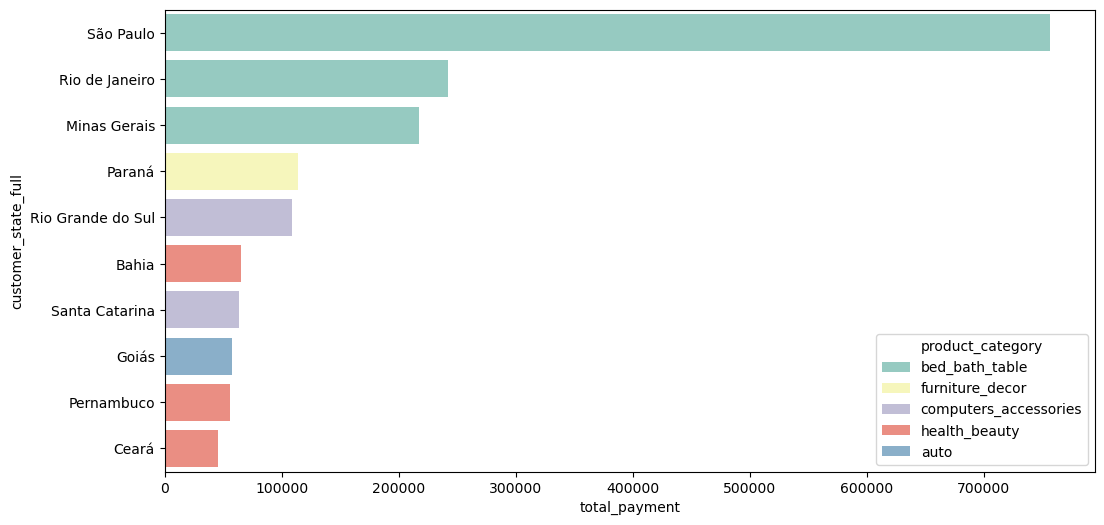

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data = top_three_states,
            y = 'customer_state_full',
            x = 'total_payment',
            hue = 'product_category',
            palette = 'Set3',
            dodge=False)

In [ ]:
## Now I want to visualize all the states


In [ ]:
# Run these and share the output:
print(top_three.columns.tolist())
print(top_three['customer_state_full'].unique())

top_three_rank_one = top_three[top_three['rank'] == 1]
print(f"Number of states: {top_three_rank_one.shape[0]}")
top_three_rank_one.head()

['customer_state_full', 'product_category', 'total_payment', 'rank']
['Acre' 'Alagoas' 'Amazonas' 'Amapá' 'Bahia' 'Ceará' 'Federal District'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Minas Gerais' 'Mato Grosso do Sul'
 'Mato Grosso' 'Pará' 'Paraíba' 'Pernambuco' 'Piauí' 'Paraná'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rondônia' 'Roraima'
 'Rio Grande do Sul' 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']
Number of states: 27


,customer_state_full,product_category,total_payment,rank
0,Acre,furniture_decor,5261.23,1
3,Alagoas,health_beauty,14741.33,1
6,Amazonas,computers_accessories,5866.85,1
9,Amapá,computers_accessories,4128.95,1
12,Bahia,health_beauty,65382.14,1


   customer_state_full customer_state_code       product_category
0                 Acre                  AC        furniture_decor
3              Alagoas                  AL          health_beauty
6             Amazonas                  AM  computers_accessories
9                Amapá                  AP  computers_accessories
12               Bahia                  BA          health_beauty


/var/folders/qd/lt2_02j17m3gmvdmpghxzg5m0000gn/T/ipykernel_79369/2619849167.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



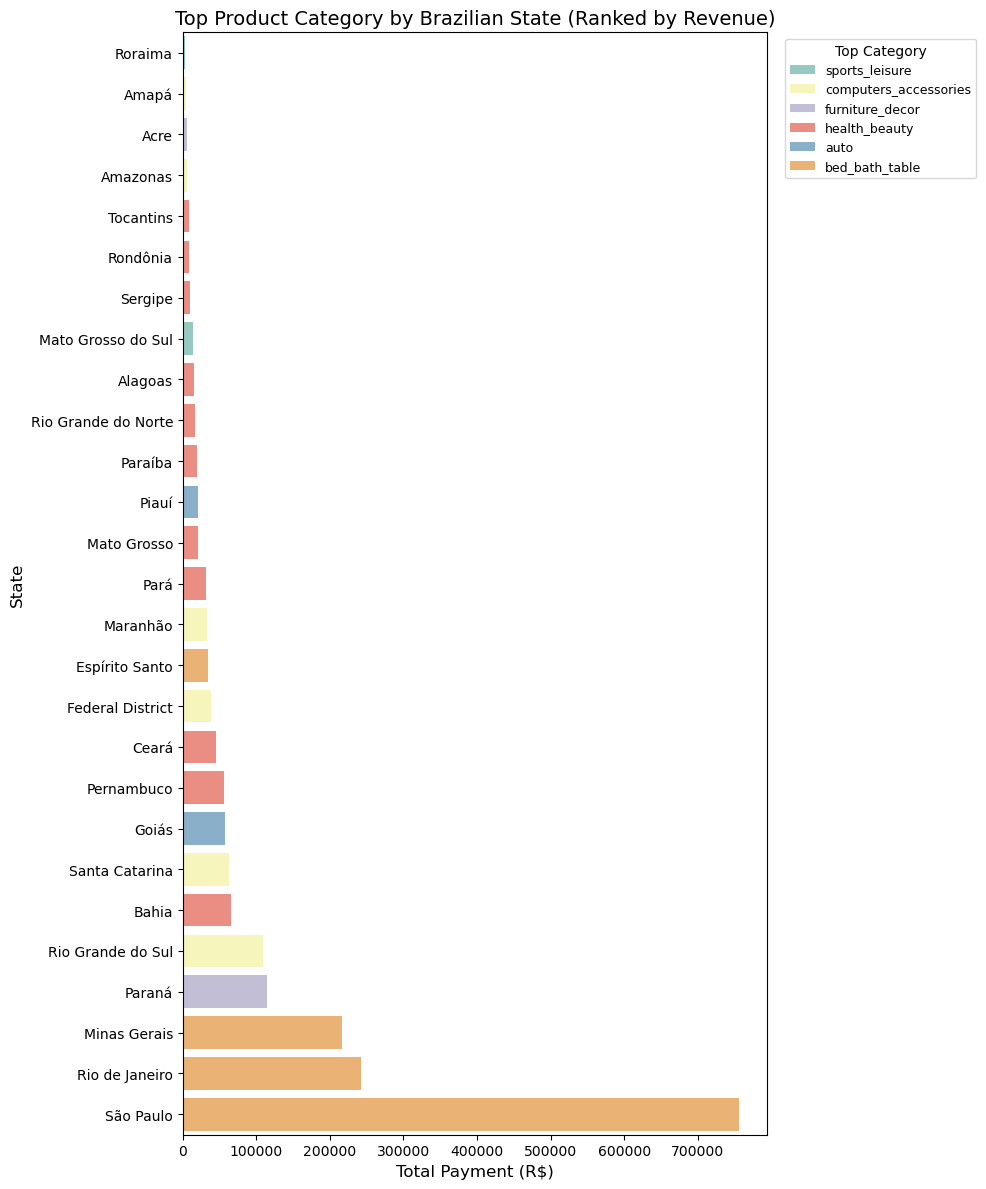

In [ ]:

# Prepare data
top_three_rank_one = top_three[top_three['rank'] == 1].sort_values('total_payment', ascending=True)

# Create plot
plt.figure(figsize=(10, 12))
sns.barplot(
    data=top_three_rank_one,
    y='customer_state_full',
    x='total_payment',
    hue='product_category',
    palette='Set3',
    dodge=False
)

plt.xlabel('Total Payment (R$)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Top Product Category by Brazilian State (Ranked by Revenue)', fontsize=14)
plt.legend(title='Top Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
top_three_states_per_category = pd.read_csv('/Users/anuka/Documents/python_projects/october/top_three_per_category.csv')
top_three_states_per_category.head(10)

,product_category_name_english,customer_state,customer_state_full,total_payment,rank,pct_of_category
0,agro_industry_and_commerce,MG,Minas Gerais,44016.72,1,38.07
1,agro_industry_and_commerce,SP,São Paulo,30871.12,2,26.70
2,agro_industry_and_commerce,RJ,Rio de Janeiro,9770.67,3,8.45
3,air_conditioning,SP,São Paulo,42274.58,1,47.58
4,air_conditioning,RJ,Rio de Janeiro,23252.50,2,26.17
5,air_conditioning,MG,Minas Gerais,6258.30,3,7.04
6,art,SP,São Paulo,16204.96,1,56.86
7,art,RJ,Rio de Janeiro,3725.10,2,13.07
8,art,MG,Minas Gerais,1699.96,3,5.97
9,arts_and_craftmanship,SP,São Paulo,1189.39,1,51.13


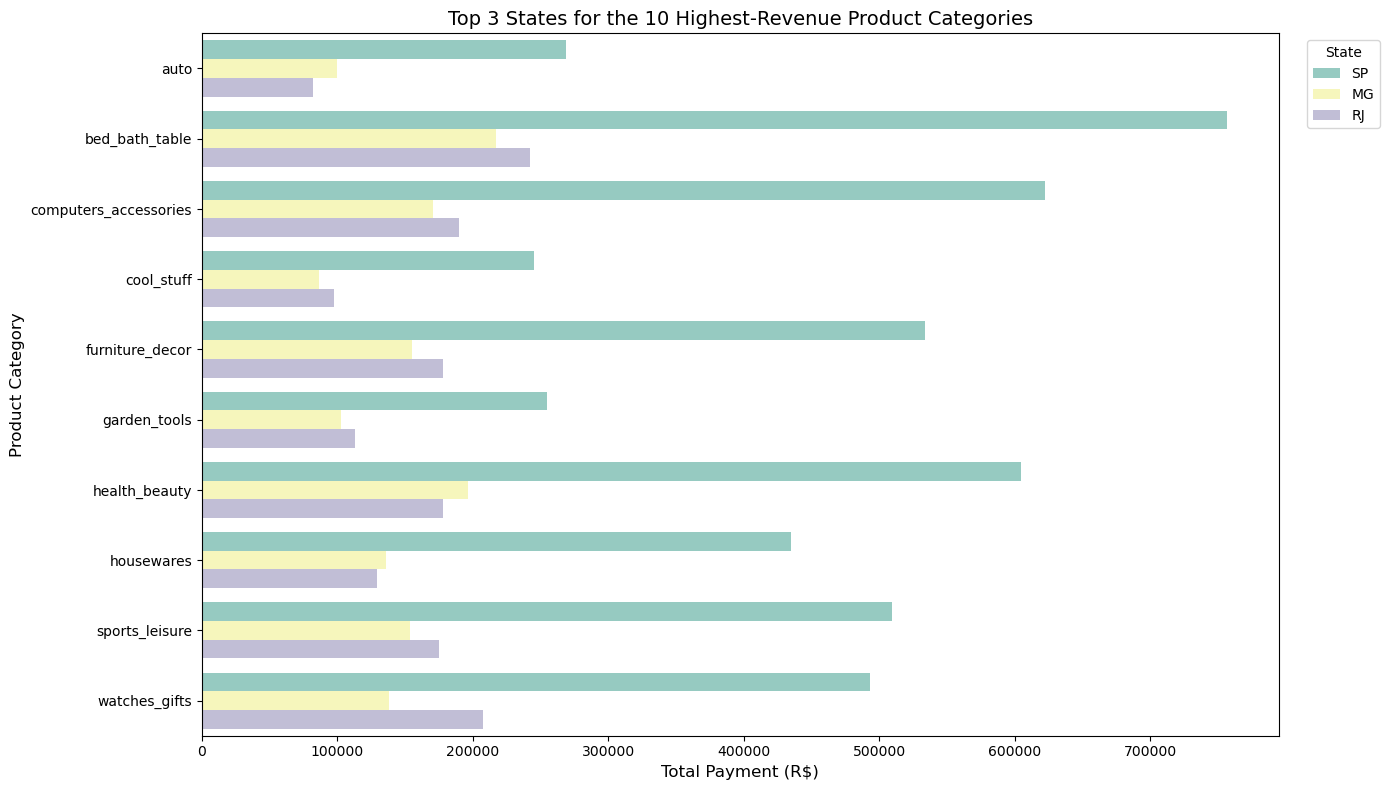

In [ ]:
# Get top 10 categories by total revenue
top_categories = top_three_states_per_category.groupby('product_category_name_english')['total_payment'].sum().nlargest(10).index

# Filter to only these categories, top 3 states each
top_three_filtered = top_three_states_per_category[
    top_three_states_per_category['product_category_name_english'].isin(top_categories)
]

# Get rank within each category
top_three_filtered = top_three_filtered.sort_values(['product_category_name_english', 'total_payment'], ascending=[True, False])
top_three_filtered['rank'] = top_three_filtered.groupby('product_category_name_english').cumcount() + 1
top_three_filtered = top_three_filtered[top_three_filtered['rank'] <= 3]

# Visualize
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_three_filtered,
    y='product_category_name_english',
    x='total_payment',
    hue='customer_state',
    palette='Set3'
)

plt.xlabel('Total Payment (R$)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.title('Top 3 States for the 10 Highest-Revenue Product Categories', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Calculate the monhtly difference for each product category
I really enjoy this part because I find this very informative and fun exercise

In [ ]:
monthly_diff = pd.read_csv('/Users/anuka/Documents/python_projects/october/monthly_diff_analysis.csv')
monthly_diff.head(100)

,product_category_name_english,order_purchase_timestamp,year,month,monthly_revenue
0,agro_industry_and_commerce,2017-01-23 07:03:04,2017,1,169.18
1,agro_industry_and_commerce,2017-02-13 13:00:36,2017,2,331.10
2,agro_industry_and_commerce,2017-03-17 15:57:36,2017,3,110.69
3,agro_industry_and_commerce,2017-05-28 23:01:27,2017,5,1763.74
4,agro_industry_and_commerce,2017-06-26 13:44:08,2017,6,1422.05
...,...,...,...,...,...
95,auto,2017-11-15 13:47:34,2017,11,45390.34
96,auto,2017-12-02 14:08:33,2017,12,52504.86
97,auto,2018-01-07 19:59:42,2018,1,49737.02
98,auto,2018-02-01 07:47:34,2018,2,51586.49


In [95]:
# Create a year-month column for easier analysis
monthly_diff['year_month'] = monthly_diff['year'].astype(str) + '-' + monthly_diff['month'].astype(str).str.zfill(2)

# What's the full date range?
print(f"Start: {monthly_diff['year_month'].min()}")
print(f"End: {monthly_diff['year_month'].max()}")

# How many unique year-month combinations?
unique_months = monthly_diff['year_month'].nunique()
print(f"Total unique months: {unique_months}")

Start: 2016-10
End: 2018-08
Total unique months: 22


In [114]:
monthly_revenue = monthly_diff.groupby(['product_category_name_english', 'year', 'month'])['monthly_revenue'].sum().reset_index()

In [115]:
monthly_revenue.head(10)
monthly_revenue.columns = ['category', 'year', 'month', 
                           'monthly_revenue']

In [116]:
monthly_revenue['year_month'] = monthly_revenue['year'].astype(str) + "-" + monthly_revenue['month'].astype(str).str.zfill(2)
monthly_revenue = monthly_revenue.sort_values(['category', 'year_month'])
monthly_revenue

,category,year,month,monthly_revenue,year_month
0,agro_industry_and_commerce,2017,1,169.18,2017-01
1,agro_industry_and_commerce,2017,2,331.10,2017-02
2,agro_industry_and_commerce,2017,3,110.69,2017-03
3,agro_industry_and_commerce,2017,5,1763.74,2017-05
4,agro_industry_and_commerce,2017,6,1422.05,2017-06
...,...,...,...,...,...
1237,watches_gifts,2018,4,106336.85,2018-04
1238,watches_gifts,2018,5,145869.23,2018-05
1239,watches_gifts,2018,6,105922.17,2018-06
1240,watches_gifts,2018,7,109159.53,2018-07


In [ ]:
# how many unique months does each category have?
category_month_count = monthly_revenue.groupby('category')['year_month'].count()
print("Distribution months per category:")
print(category_month_count.describe())
print()

complete_categories = category_month_count[category_month_count == 22]
print(f"Categories with all 22 months: {len(complete_categories)} out of {len(category_month_count)}")
print()

substantial_categories = category_month_count[category_month_count >= 12]
print(f"Categories with 12+ months: {len(substantial_categories)}")

Distribution months per category:
count    71.000000
mean     17.492958
std       4.572818
min       2.000000
25%      14.500000
50%      20.000000
75%      21.000000
max      22.000000
Name: year_month, dtype: float64

Categories with all 22 months: 1 out of 71

Categories with 12+ months: 62


In [ ]:
#another appraoch with th
#category_month_agg = monthly_revenue.groupby('category').agg({'year_month': 'count'})

                            year_month
category                              
agro_industry_and_commerce          19
air_conditioning                    21
art                                 18
arts_and_craftmanship                6
audio                               20
...                                ...
stationery                          20
tablets_printing_image              17
telephony                           21
toys                                21
watches_gifts                       21

[71 rows x 1 columns]


In [142]:
## Use categories for 12 months minimum 
susbtantial_cats = substantial_categories.index
print(f"Categories kept: {len(susbtantial_cats)} out of {monthly_revenue['category'].nunique()}")

Categories kept: 62 out of 71


In [144]:
#Now time to filter

monthly_revenue['category'].isin(susbtantial_cats)

0       True
1       True
2       True
3       True
4       True
        ... 
1237    True
1238    True
1239    True
1240    True
1241    True
Name: category, Length: 1242, dtype: bool

In [151]:
# Use the mask 

mask = monthly_revenue['category'].isin(susbtantial_cats)
monthly_revenue_filtered = monthly_revenue[mask]
monthly_revenue_filtered = monthly_revenue_filtered.sort_values(['category', 'year_month'])
monthly_revenue_filtered

,category,year,month,monthly_revenue,year_month
0,agro_industry_and_commerce,2017,1,169.18,2017-01
1,agro_industry_and_commerce,2017,2,331.10,2017-02
2,agro_industry_and_commerce,2017,3,110.69,2017-03
3,agro_industry_and_commerce,2017,5,1763.74,2017-05
4,agro_industry_and_commerce,2017,6,1422.05,2017-06
...,...,...,...,...,...
1237,watches_gifts,2018,4,106336.85,2018-04
1238,watches_gifts,2018,5,145869.23,2018-05
1239,watches_gifts,2018,6,105922.17,2018-06
1240,watches_gifts,2018,7,109159.53,2018-07


In [153]:
print('First 15 rows after sorting: ')
print(monthly_revenue_filtered[['category', 'year_month', 'monthly_revenue']].head(15))

First 15 rows after sorting: 
                      category year_month  monthly_revenue
0   agro_industry_and_commerce    2017-01           169.18
1   agro_industry_and_commerce    2017-02           331.10
2   agro_industry_and_commerce    2017-03           110.69
3   agro_industry_and_commerce    2017-05          1763.74
4   agro_industry_and_commerce    2017-06          1422.05
5   agro_industry_and_commerce    2017-07          1199.47
6   agro_industry_and_commerce    2017-08           898.40
7   agro_industry_and_commerce    2017-09          2967.01
8   agro_industry_and_commerce    2017-10          3558.43
9   agro_industry_and_commerce    2017-11         45878.42
10  agro_industry_and_commerce    2017-12          6796.16
11  agro_industry_and_commerce    2018-01          6761.99
12  agro_industry_and_commerce    2018-02         10835.68
13  agro_industry_and_commerce    2018-03          5909.15
14  agro_industry_and_commerce    2018-04          4783.66


Shifting the values to the next one using shift(1) method

In [155]:
monthly_revenue_filtered['previous_month_revenue'] = monthly_revenue_filtered.groupby('category')['monthly_revenue'].shift(1)
print('\nFirst 20 rows with previous month revenue:')
print(monthly_revenue_filtered[['category', 'year_month', 'monthly_revenue', 'previous_month_revenue']].head(30))


First 20 rows with previous month revenue:
                      category year_month  monthly_revenue  \
0   agro_industry_and_commerce    2017-01           169.18   
1   agro_industry_and_commerce    2017-02           331.10   
2   agro_industry_and_commerce    2017-03           110.69   
3   agro_industry_and_commerce    2017-05          1763.74   
4   agro_industry_and_commerce    2017-06          1422.05   
5   agro_industry_and_commerce    2017-07          1199.47   
6   agro_industry_and_commerce    2017-08           898.40   
7   agro_industry_and_commerce    2017-09          2967.01   
8   agro_industry_and_commerce    2017-10          3558.43   
9   agro_industry_and_commerce    2017-11         45878.42   
10  agro_industry_and_commerce    2017-12          6796.16   
11  agro_industry_and_commerce    2018-01          6761.99   
12  agro_industry_and_commerce    2018-02         10835.68   
13  agro_industry_and_commerce    2018-03          5909.15   
14  agro_industry_and_comm

Calculate Month-over-Month Growth %

In [173]:
monthly_revenue_filtered['mon_growth_pct'] = ((monthly_revenue_filtered['monthly_revenue'] - monthly_revenue_filtered['previous_month_revenue'])/monthly_revenue_filtered['previous_month_revenue'])*100
print('\nFirst 20 rows with growth %:')
monthly_revenue_filtered.head(50)


First 20 rows with growth %:


,category,year,month,monthly_revenue,year_month,previous_month_revenue,mon_growth_pct
0,agro_industry_and_commerce,2017,1,169.18,2017-01,NaN,NaN
1,agro_industry_and_commerce,2017,2,331.10,2017-02,169.18,95.708713
2,agro_industry_and_commerce,2017,3,110.69,2017-03,331.10,-66.569012
3,agro_industry_and_commerce,2017,5,1763.74,2017-05,110.69,1493.405005
4,agro_industry_and_commerce,2017,6,1422.05,2017-06,1763.74,-19.373037
5,agro_industry_and_commerce,2017,7,1199.47,2017-07,1422.05,-15.652052
6,agro_industry_and_commerce,2017,8,898.40,2017-08,1199.47,-25.100253
7,agro_industry_and_commerce,2017,9,2967.01,2017-09,898.40,230.254898
8,agro_industry_and_commerce,2017,10,3558.43,2017-10,2967.01,19.933199
9,agro_industry_and_commerce,2017,11,45878.42,2017-11,3558.43,1189.288254


In [166]:
growth_data = monthly_revenue_filtered[monthly_revenue_filtered['previous_month_revenue'].notna()].copy()

In [170]:
print(f"Growth rate statistics:")
print(growth_data['mon_growth_pct'].describe())

print(f"\nRows before cleaning: {len(monthly_revenue_filtered)}")
print(f"Rows after removing NaN: {len(growth_data)}")

Growth rate statistics:
count     1110.000000
mean       101.014650
std        613.443223
min        -98.553572
25%        -27.697545
50%          9.517776
75%         73.929068
max      13598.114169
Name: mon_growth_pct, dtype: float64

Rows before cleaning: 1172
Rows after removing NaN: 1110


This growth rate looks very unreasonable, hence I could not realistically calculate the growth rate. It is more like volatility from low base numbers. First, finding the extreme growth number categories.

In [171]:
len(growth_data)

1110

In [ ]:
# Only calculate growth when previous month had meaningful revenue (e.g >500 dollars)
# This is due to some months have low revenue (e.g 92.78 dollars art category in year 2017 december)
growth_data_filtered = growth_data[growth_data['previous_month_revenue']>500].copy()
print(f"\nRows after filtering low vase values: {len(growth_data_filtered)}")
print(growth_data_filtered['mon_growth_pct'].describe())


Rows after filtering low vase values: 925
count     925.000000
mean       41.971129
std       180.348293
min       -98.553572
25%       -28.269153
50%         5.458241
75%        51.742779
max      2636.154113
Name: mon_growth_pct, dtype: float64


Use Median growth instead of Mean growth

In [178]:
median_growth = growth_data_filtered.groupby('category')['mon_growth_pct'].median().sort_values(ascending=False)
median_growth.head(10)

category
construction_tools_safety          31.261121
watches_gifts                      28.540595
construction_tools_lights          27.053887
construction_tools_construction    26.845465
computers                          26.310429
pet_shop                           25.815803
home_appliances                    25.430874
telephony                          17.715432
office_furniture                   16.504929
luggage_accessories                15.895195
Name: mon_growth_pct, dtype: float64

In [179]:
median_growth.describe()

count    61.000000
mean     -3.113159
std      26.975904
min     -90.489224
25%      -8.256576
50%       5.407304
75%      11.629883
max      31.261121
Name: mon_growth_pct, dtype: float64

In [180]:
print("TOP 10 FASTEST Growing (by median):")
print(median_growth.head(10))

print('\nBOTTOM 10 (declining):')
print(median_growth.tail(10))

TOP 10 FASTEST Growing (by median):
category
construction_tools_safety          31.261121
watches_gifts                      28.540595
construction_tools_lights          27.053887
construction_tools_construction    26.845465
computers                          26.310429
pet_shop                           25.815803
home_appliances                    25.430874
telephony                          17.715432
office_furniture                   16.504929
luggage_accessories                15.895195
Name: mon_growth_pct, dtype: float64

BOTTOM 10 (declining):
category
market_place              -21.080330
drinks                    -27.951883
fashion_underwear_beach   -37.531524
cine_photo                -41.096544
tablets_printing_image    -52.753246
music                     -58.347954
dvds_blu_ray              -70.892449
party_supplies            -71.007858
fashio_female_clothing    -74.229658
fashion_sport             -90.489224
Name: mon_growth_pct, dtype: float64


In [182]:
# Average (mean) growth per category
mean_growth = growth_data_filtered.groupby('category')['mon_growth_pct'].mean().sort_values(ascending=False)

print("\n=== TOP 10 BY AVERAGE (MEAN) MON GROWTH ===")
print(mean_growth.head(10))


=== TOP 10 BY AVERAGE (MEAN) MON GROWTH ===
category
drinks                                     229.219838
fixed_telephony                            156.847613
signaling_and_security                     140.074298
costruction_tools_tools                    115.581390
air_conditioning                            98.708851
agro_industry_and_commerce                  91.189763
computers                                   89.444528
furniture_living_room                       77.743030
kitchen_dining_laundry_garden_furniture     74.532717
garden_tools                                72.723592
Name: mon_growth_pct, dtype: float64


Now it is time to visualize. I choose median growth here, since mean shows very volatile numbers with occasional spikes rather than sustained growth

In [209]:
top_10_growth = median_growth.head(10)
bottom_10_growth = median_growth.tail(10)

combined_growth = pd.concat([top_10_growth, bottom_10_growth])

In [212]:
combined_growth.values

array([ 31.26112108,  28.54059531,  27.05388743,  26.84546452,
        26.31042866,  25.81580263,  25.43087446,  17.71543231,
        16.5049289 ,  15.89519451, -21.08033041, -27.95188326,
       -37.53152377, -41.0965436 , -52.7532459 , -58.34795399,
       -70.89244909, -71.00785804, -74.22965849, -90.48922406])

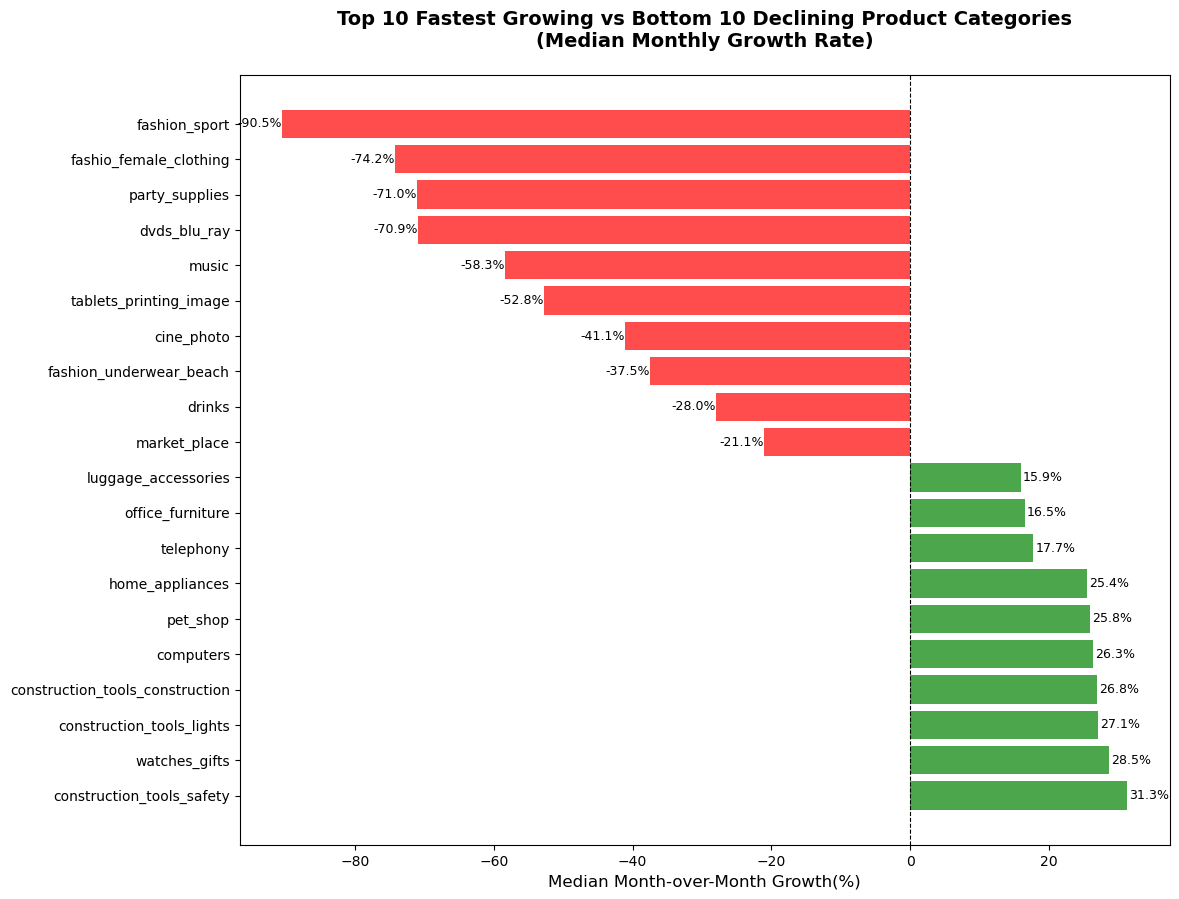

In [217]:
fig,ax = plt.subplots(figsize=(12,10))
colors = ['green' if x>0 else 'red' for x in combined_growth.values]
bars = ax.barh(range(len(combined_growth)), combined_growth.values, color=colors, alpha=0.7)

ax.set_yticks(range(len(combined_growth)))
ax.set_yticklabels(combined_growth.index, fontsize=10)

ax.set_xlabel('Median Month-over-Month Growth(%)', fontsize=12)
ax.set_title('Top 10 Fastest Growing vs Bottom 10 Declining Product Categories\n(Median Monthly Growth Rate)', fontsize=14, 
fontweight ='bold', pad=20)
ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')


for i in range(len(combined_growth)):
    bar = bars[i]
    value = combined_growth.values[i]
    category_name = combined_growth.index[i]

    label = f'{value:.1f}%'

    if value > 0:
        x_position = value+0.3
        ax.text(x_position, i, label, va='center', fontsize=9)
    else:
        x_position = value -0.005
        ax.text(x_position, i, label, va='center', ha='right', fontsize=9)


In [186]:
top_10_growth

category
construction_tools_safety          31.261121
watches_gifts                      28.540595
construction_tools_lights          27.053887
construction_tools_construction    26.845465
computers                          26.310429
pet_shop                           25.815803
home_appliances                    25.430874
telephony                          17.715432
office_furniture                   16.504929
luggage_accessories                15.895195
Name: mon_growth_pct, dtype: float64